Whole Slide Images (WSI) are captured at a very high resolution. In this dataset, 21 anonymised WSI images in Aperio SVS format, of canine carcinoma, are available. The cell annotations are provided in a SQLite3 database. 

Below we extract the dimensions of all the 21 images from the database. 

In [78]:
from SlideRunner.dataAccess.database import Database
import numpy as np

def listOfSlides(DB):
    DB.execute('SELECT uid, filename, width, height from Slides')
    return DB.fetchall()

DB = Database()
DB.open('databases/MITOS_WSI_CMC_COADEL_TR.sqlite')

for slideid,filename, width, height in listOfSlides(DB):
    print(f"Slide ID# {slideid}: {filename} {height} x {width} pixels")


Slide ID# 1: a8773be388e12df89edd.svs 57462 x 61199 pixels
Slide ID# 2: 460906c0b1fe17ea5354.svs 63831 x 136800 pixels
Slide ID# 3: 2d56d1902ca533a5b509.svs 65453 x 70199 pixels
Slide ID# 5: d0423ef9a648bb66a763.svs 85208 x 116999 pixels
Slide ID# 6: 50cf88e9a33df0c0c8f9.svs 87273 x 125999 pixels
Slide ID# 7: da18e7b9846e9d38034c.svs 84305 x 95399 pixels
Slide ID# 8: d7a8af121d7d4f3fbf01.svs 88592 x 111599 pixels
Slide ID# 9: 2191a7aa287ce1d5dbc0.svs 82534 x 98999 pixels
Slide ID# 10: 69a02453620ade0edefd.svs 90076 x 97199 pixels
Slide ID# 11: c4b95da36e32993289cb.svs 84710 x 124199 pixels
Slide ID# 12: fa4959e484beec77543b.svs 84406 x 118799 pixels
Slide ID# 13: 72c93e042d0171a61012.svs 78623 x 122399 pixels
Slide ID# 14: 4eee7b944ad5e46c60ce.svs 47721 x 44999 pixels
Slide ID# 15: b1bdee8e5e3372174619.svs 83745 x 125999 pixels
Slide ID# 16: 3d3d04eca056556b0b26.svs 87152 x 109799 pixels
Slide ID# 17: 084383c18b9060880e82.svs 82153 x 61199 pixels
Slide ID# 18: e09512d530d933e436d5.svs 

Let us load and display a WSI image with some sample annotations.

In [88]:
WSI_filename = 'deb768e5efb9d1dcbc13.svs'
import openslide
slide = openslide.open_slide('WSI/' + WSI_filename)
print(f"Slide dimensions: {slide.dimensions}")

Slide dimensions: (104399, 76426)


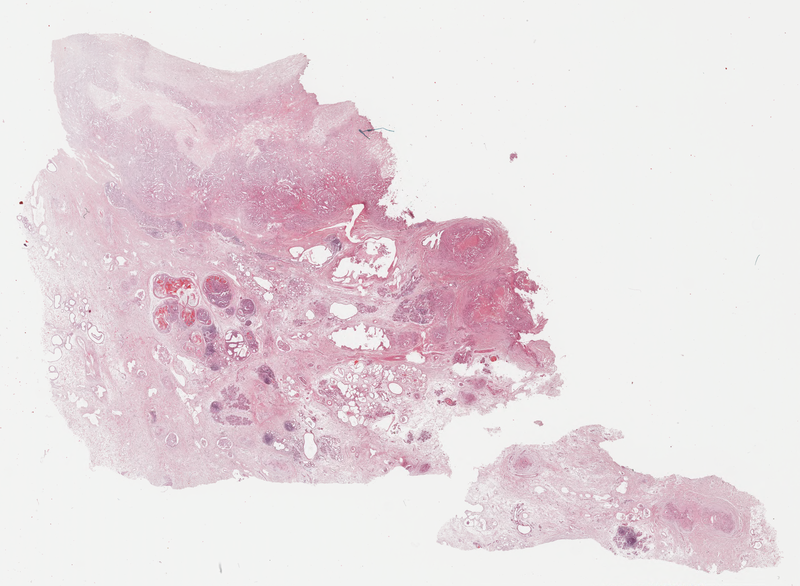

In [89]:
slide.get_thumbnail(size=[800, 800])

Let us load the annotations for this WSI image from the annotations database. 

In [90]:
slideid = DB.findSlideWithFilename(WSI_filename,'')
DB.loadIntoMemory(slideid)

print(f"{WSI_filename} has {len(DB.annotations.keys())} annotations")

deb768e5efb9d1dcbc13.svs has 569 annotations


In [91]:
# Get a few annotations 
anno = list(DB.annotations.keys())[0:5]

In [92]:
import matplotlib.pyplot as plt
import numpy as np

patchSize = 512 

coord_x = DB.annotations[anno[0]].x1
coord_y = DB.annotations[anno[0]].y1

lu_x = int(coord_x - int(patchSize/2))
lu_y = int(coord_y - int(patchSize/2))

lu = (lu_x, lu_y)
img = np.array(slide.read_region(location=(lu_x, lu_y), level=0, size=(patchSize, patchSize)))[:,:,0:4]


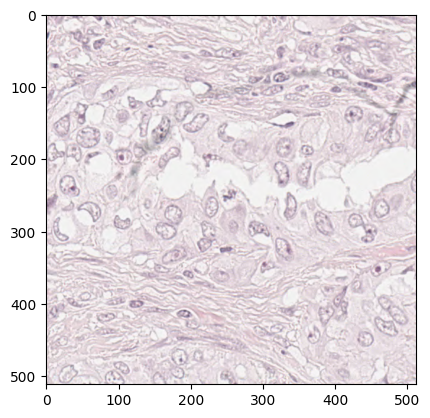

In [93]:
plt.imshow(img)

In [94]:
from SlideRunner.dataAccess.annotations import ViewingProfile
DB.annotations[anno[0]].draw(image=img, leftUpper=lu, zoomLevel=1., thickness=2, vp=ViewingProfile())

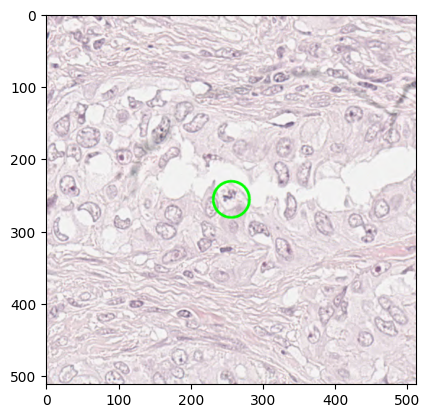

In [95]:
plt.imshow(img)